# Kaggle

https://www.kaggle.com/code/bromotdi/anime-dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 7)
plt.style.use('ggplot')
%config InlineBackend.figure_formats = {'png', 'retina'}

In [2]:
anime = pd.read_csv("anime.csv")
rating = pd.read_csv("rating.csv")

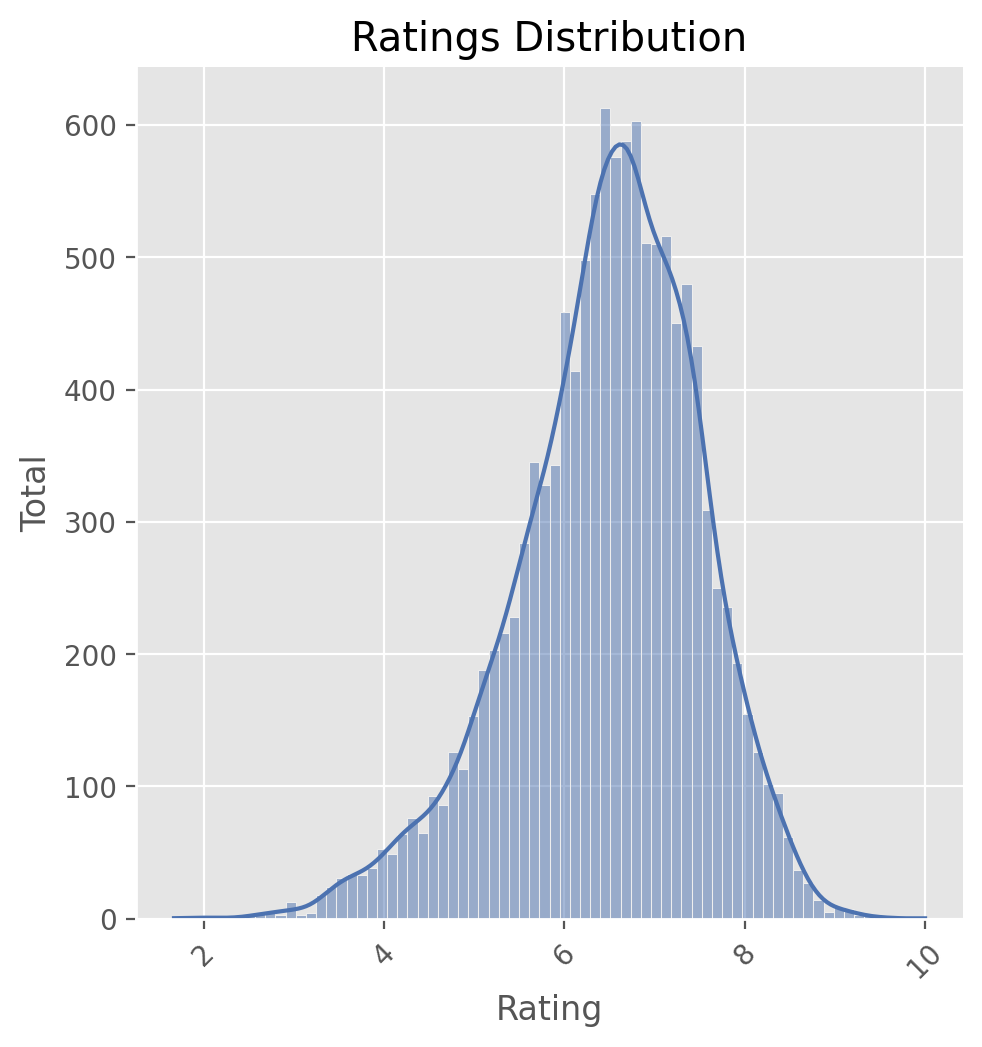

In [3]:
palette = "deep" 
sns.set_palette(palette)

sns.displot(data=anime, x='rating',kde=True)

plt.xlabel('Rating')
plt.ylabel('Total')
plt.title('Ratings Distribution')
plt.xticks(rotation=45)

plt.show()

In [4]:
anime['rating'].fillna(anime['rating'].median(),inplace=True)

In [5]:
anime['type'].fillna(anime['type'].mode()[0],inplace=True)
anime['genre'].fillna(anime['genre'].mode()[0],inplace=True)

In [6]:
rating.isnull().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

In [7]:
anime[anime.duplicated()].shape[0]

0

In [8]:
anime['name'].value_counts()

name
Shi Wan Ge Leng Xiaohua                           2
Saru Kani Gassen                                  2
Bakabon Osomatsu no Karee wo Tazunete Sansenri    1
Backkom Meogeujan Yeohaeng                        1
Backkom Mission Impossible                        1
                                                 ..
Yoroiden Samurai Troopers Kikoutei Densetsu       1
Yuu☆Yuu☆Hakusho: Mu Mu Hakusho                    1
3-gatsu no Lion meets Bump of Chicken             1
Bannou Bunka Neko-Musume                          1
Yasuji no Pornorama: Yacchimae!!                  1
Name: count, Length: 12292, dtype: int64

In [9]:
#Find entries of Shi Wan Ge Leng Xiaohua & Saru Kani Gassen anime
anime[anime['name'].isin(['Shi Wan Ge Leng Xiaohua', 'Saru Kani Gassen'])]

,anime_id,name,genre,type,episodes,rating,members
10140,22399,Saru Kani Gassen,Kids,OVA,1,5.23,62
10141,30059,Saru Kani Gassen,Drama,Movie,1,4.75,76
10193,33193,Shi Wan Ge Leng Xiaohua,"Comedy, Parody",ONA,12,6.67,114
10194,33195,Shi Wan Ge Leng Xiaohua,"Action, Adventure, Comedy, Fantasy, Parody",Movie,1,7.07,110


Based on our research and cross-referencing with external sources, we have confirmed the following:

Shi Wan Ge Leng Xiaohua:

This anime exists in two different formats: ONA (Original Net Animation) and Movie.
Both entries are valid and should be retained in our dataset.
Saru Kani Gassen:

This anime exists in two different formats: OVA (Original Video Animation) and Movie.
Both entries are valid and should be kept in our dataset.
Hence, it is appropriate to retain both entries in our dataset as they represent legitimate variations of the respective anime titles.

In [10]:
#Check for duplicate values in rating dataset
rating[rating.duplicated()].shape[0]

1

In [11]:
#Drop duplicate value
rating.drop_duplicates(keep='first',inplace=True)

#Check no duplicate value is present
rating[rating.duplicated()].shape[0]

0

In [12]:
data = pd.merge(anime,rating,on="anime_id",suffixes= [None, "_user"])
data = data.rename(columns={"rating_user": "user_rating"})
print("Shape of merged data : ",data.shape)

Shape of merged data :  (7813726, 9)


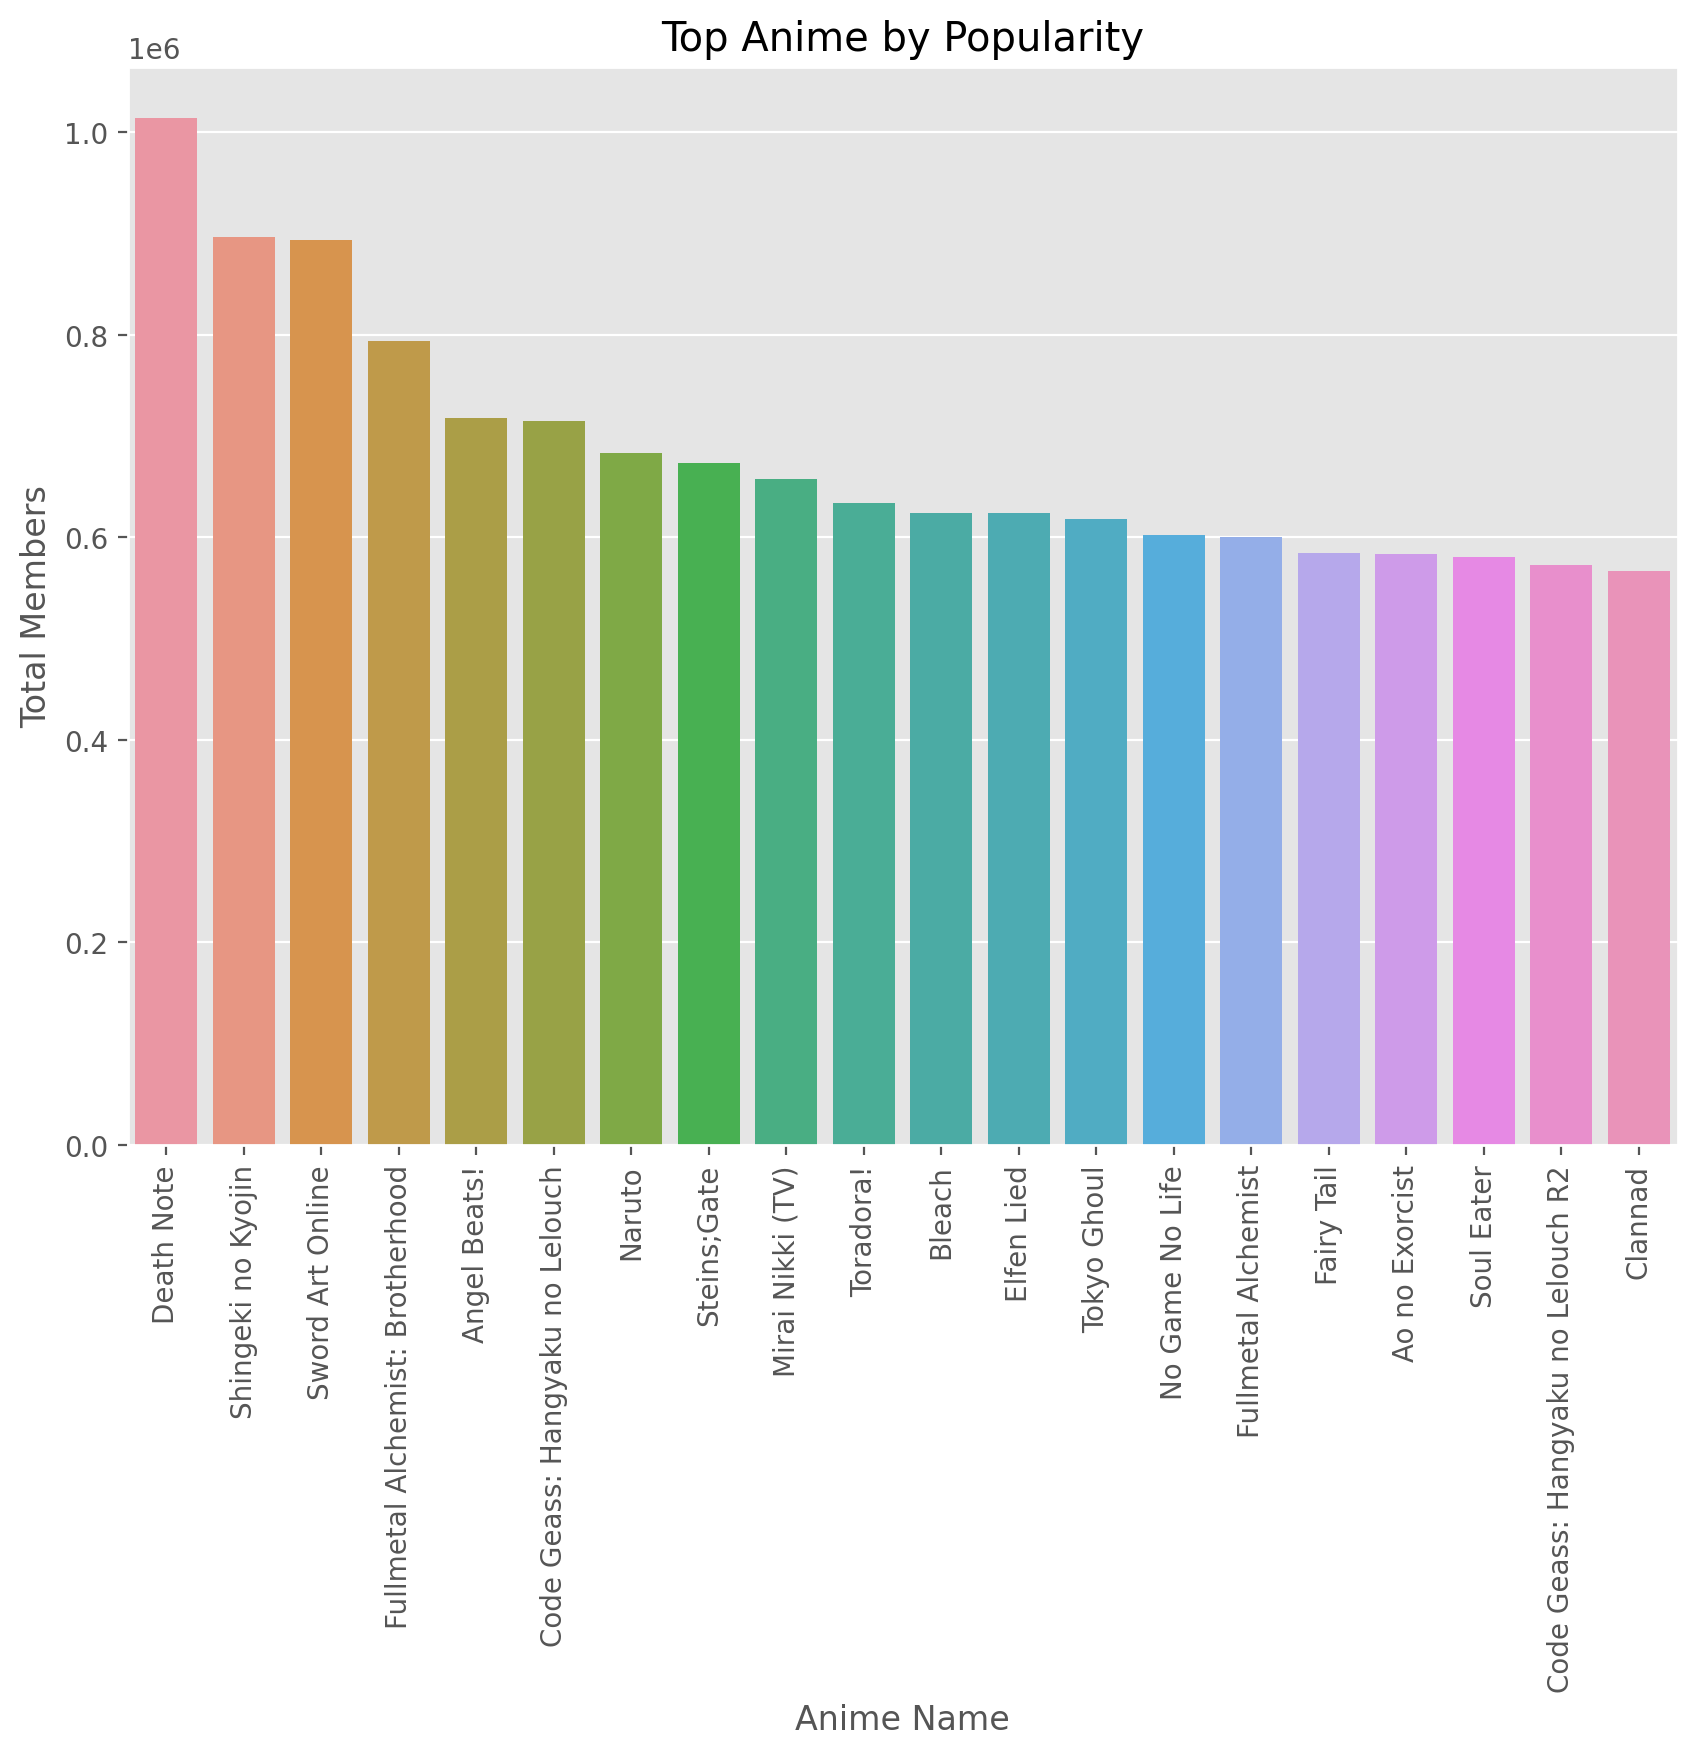

In [13]:
top_anime = anime.sort_values(["members"],ascending=False)

sns.barplot(x=top_anime["name"][:20],y=top_anime["members"][:20])
plt.xlabel("Anime Name")
plt.ylabel('Total Members')
plt.title("Top Anime by Popularity")
plt.xticks(rotation=90)

plt.show()

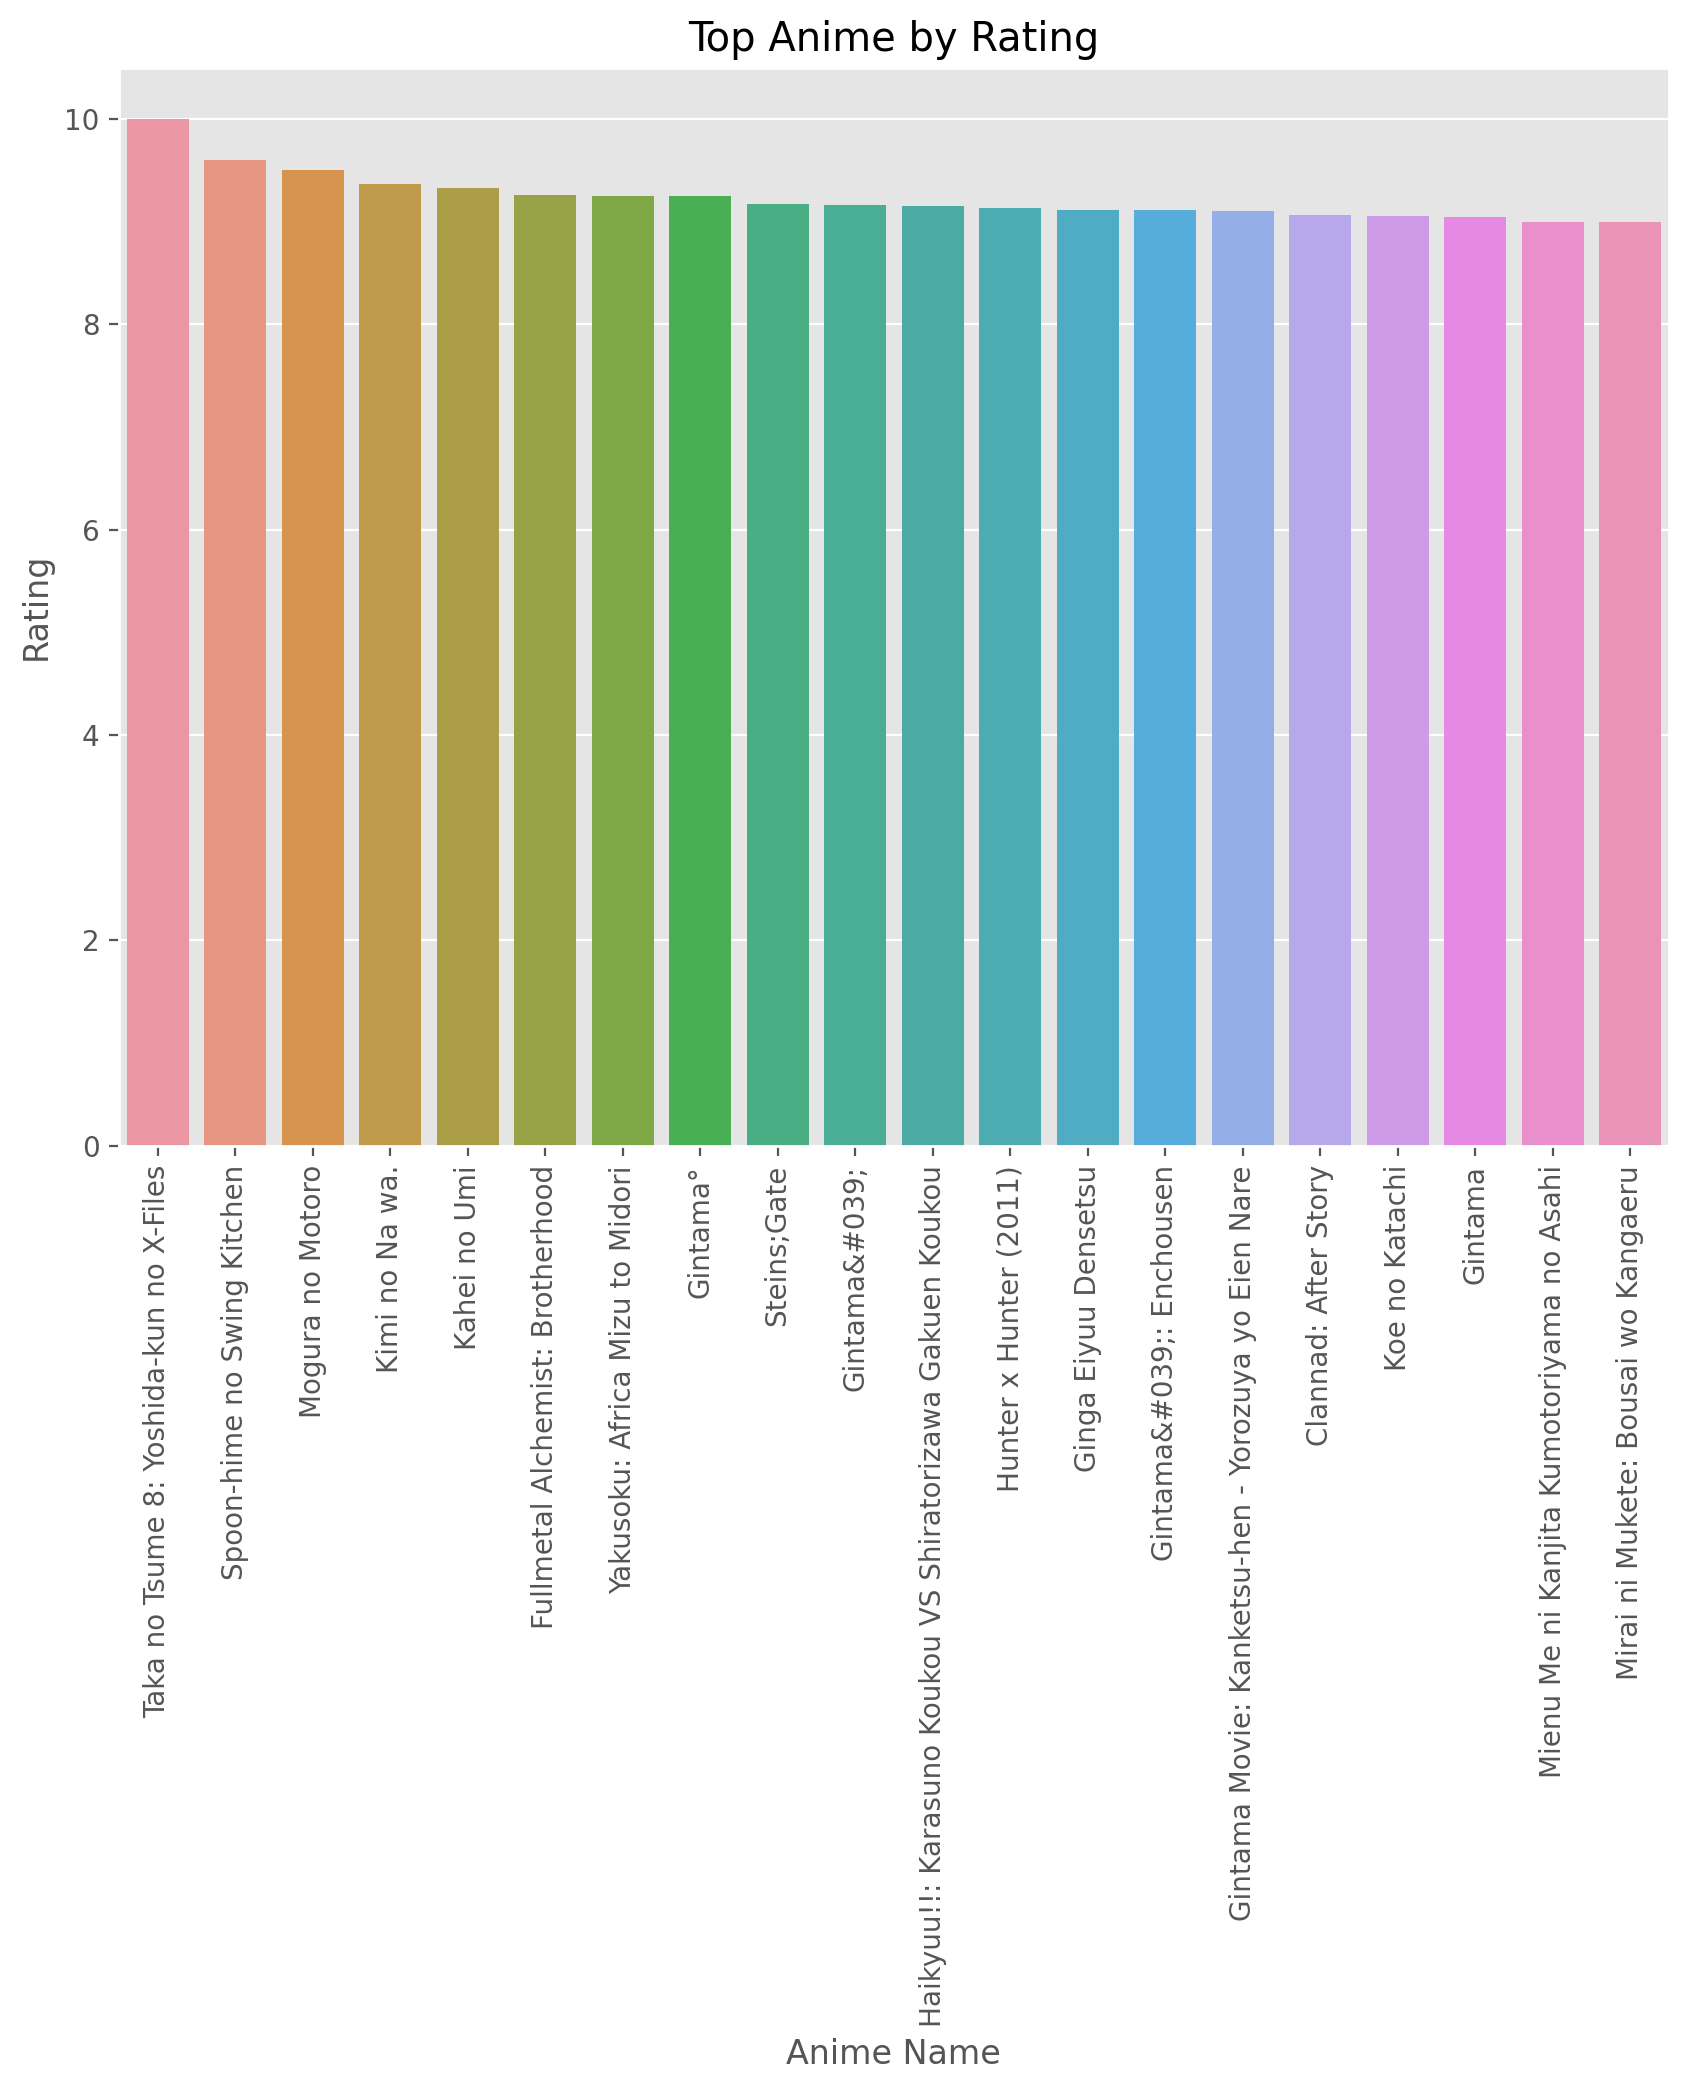

In [14]:
top_anime = anime.sort_values(["rating"],ascending=False)

sns.barplot(x=top_anime["name"][:20],y=top_anime["rating"][:20])
plt.xlabel("Anime Name")
plt.ylabel('Rating')
plt.title("Top Anime by Rating")
plt.xticks(rotation=90)

plt.show()

In [15]:
anime.value_counts("type")

type
TV         3812
OVA        3311
Movie      2348
Special    1676
ONA         659
Music       488
Name: count, dtype: int64

Anime Category Distribution
type
TV         31.01
OVA        26.93
Movie      19.10
Special    13.63
ONA         5.36
Music       3.97
Name: proportion, dtype: float64


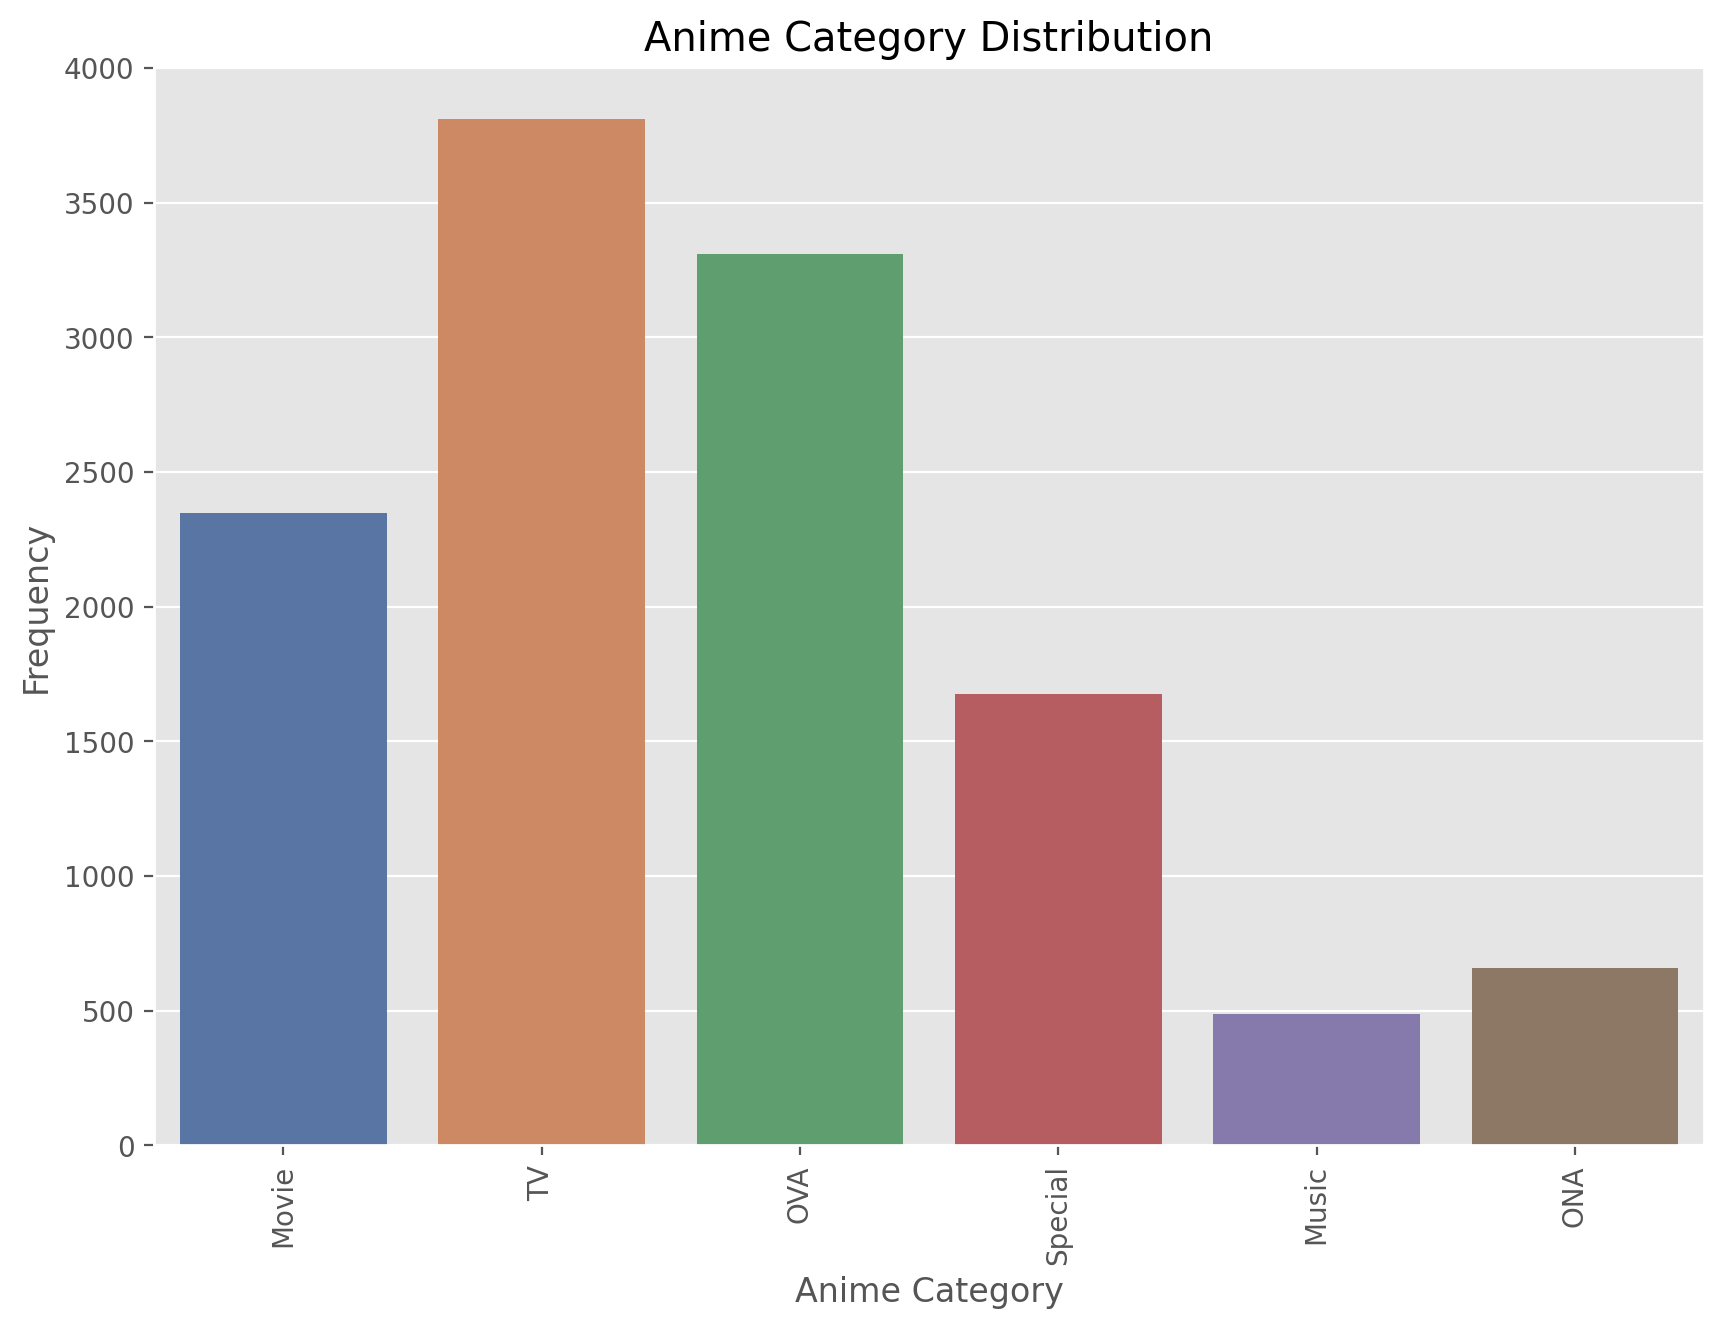

In [16]:
print("Anime Category Distribution")
print(round(anime.value_counts("type",normalize=True).mul(100),2))

sns.countplot(data=anime,x='type')
plt.xlabel("Anime Category")
plt.ylabel('Frequency')
plt.title("Anime Category Distribution")
plt.xticks(rotation=90)

plt.show()

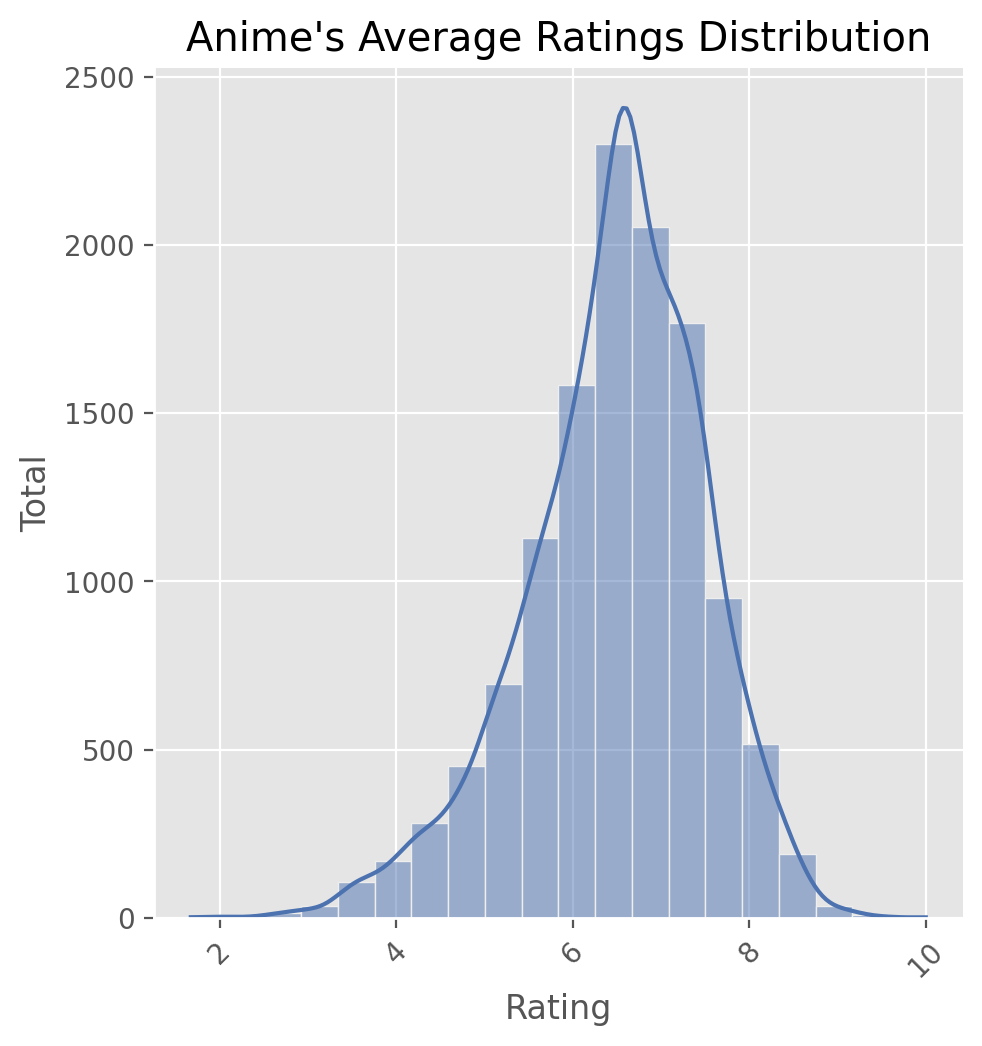

In [17]:
sns.displot(data=anime, x='rating',kde=True,bins=20)
plt.xlabel('Rating')
plt.ylabel('Total')
plt.title("Anime's Average Ratings Distribution")
plt.xticks(rotation=45)

plt.show()

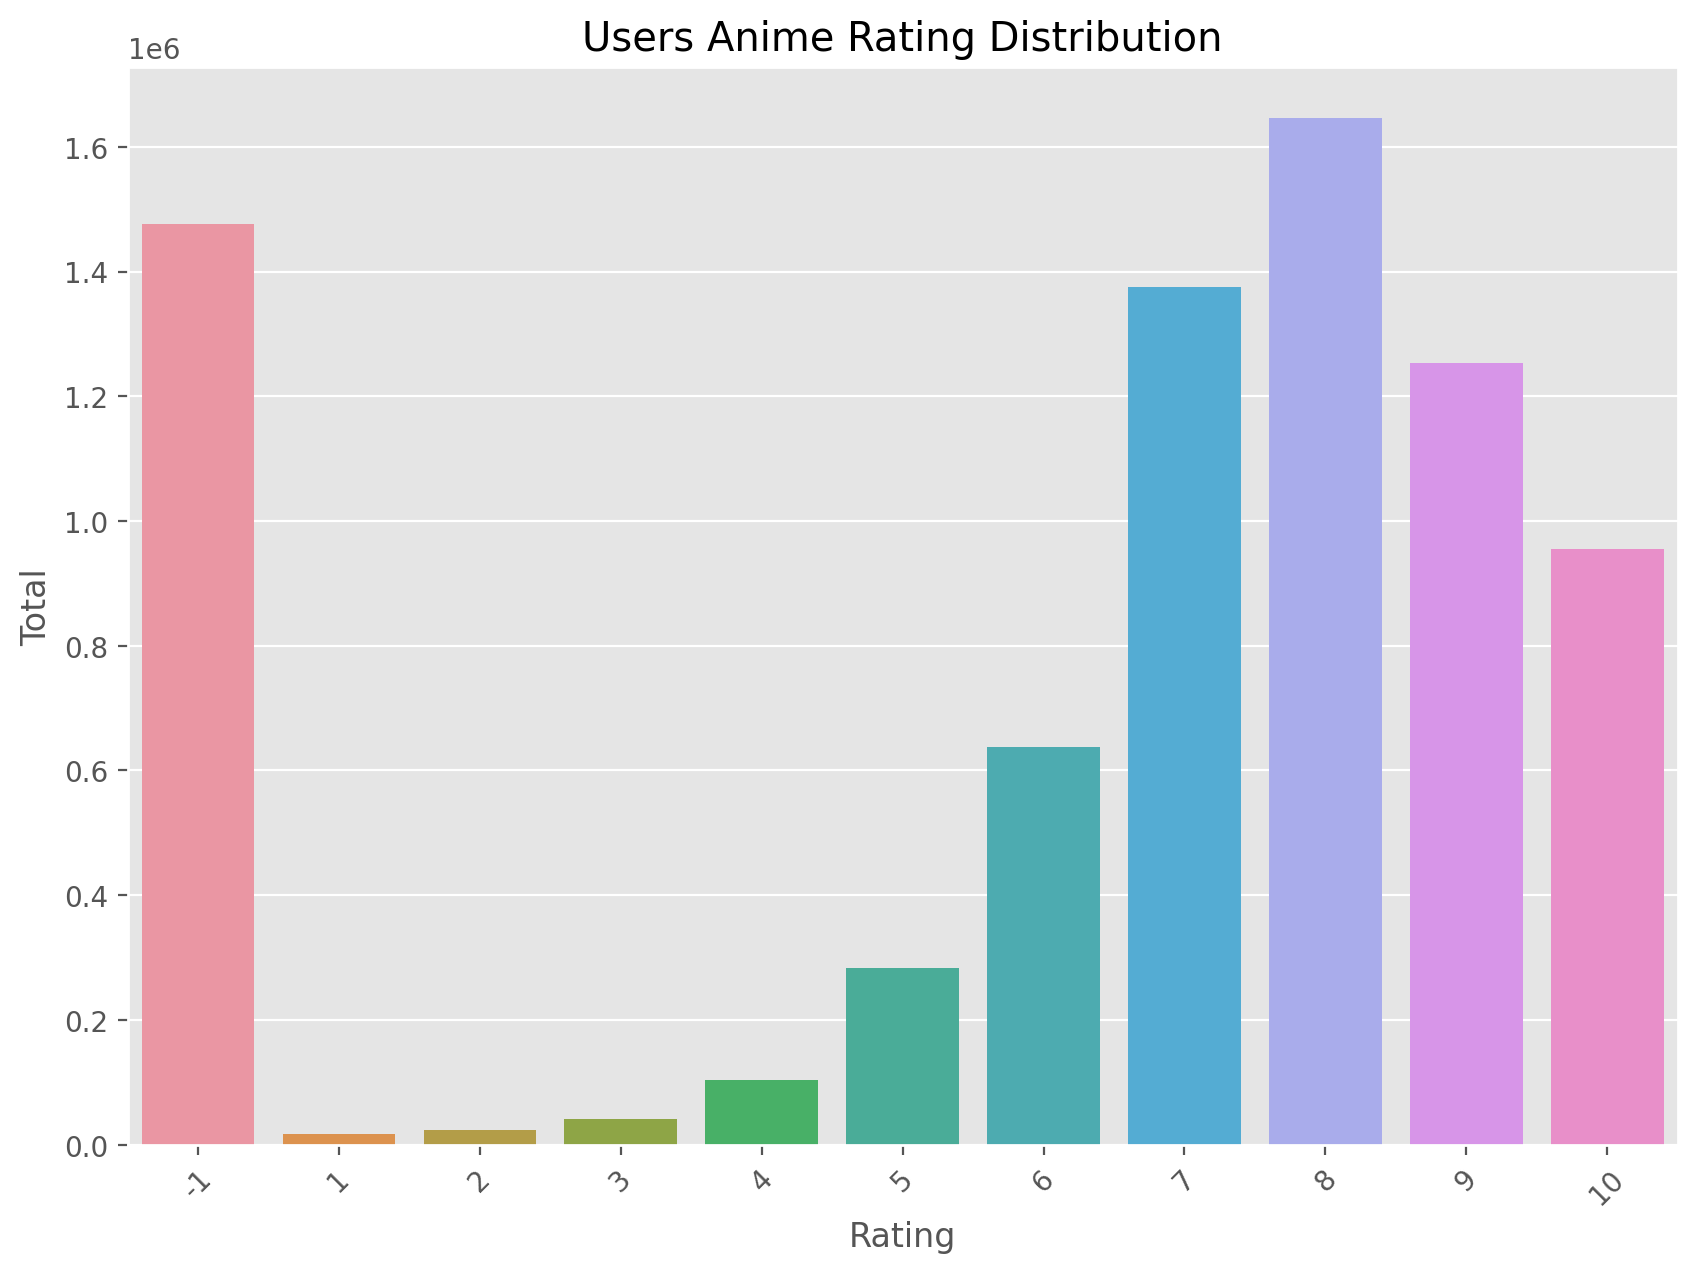

In [18]:
user_rating_count = data['user_rating'].value_counts().sort_index()

sns.barplot(x=user_rating_count.index,y=user_rating_count.values)
plt.xlabel('Rating')
plt.ylabel('Total')
plt.title("Users Anime Rating Distribution")
plt.xticks(rotation=45)

plt.show()

Insights:

The majority of anime ratings are distributed between 5.5 and 8.0, indicating a wide range of ratings across the dataset.
User ratings, on the other hand, are predominantly distributed between 6.0 and 10.0, suggesting a higher inclination towards positive ratings by users.
Both the anime ratings and user ratings distributions exhibit a left skew, with a longer tail on the left side.
It's worth noting that there is an outlier in the user ratings, rating of -1. This outlier can be considered an anomaly and can be discarded from the analysis.

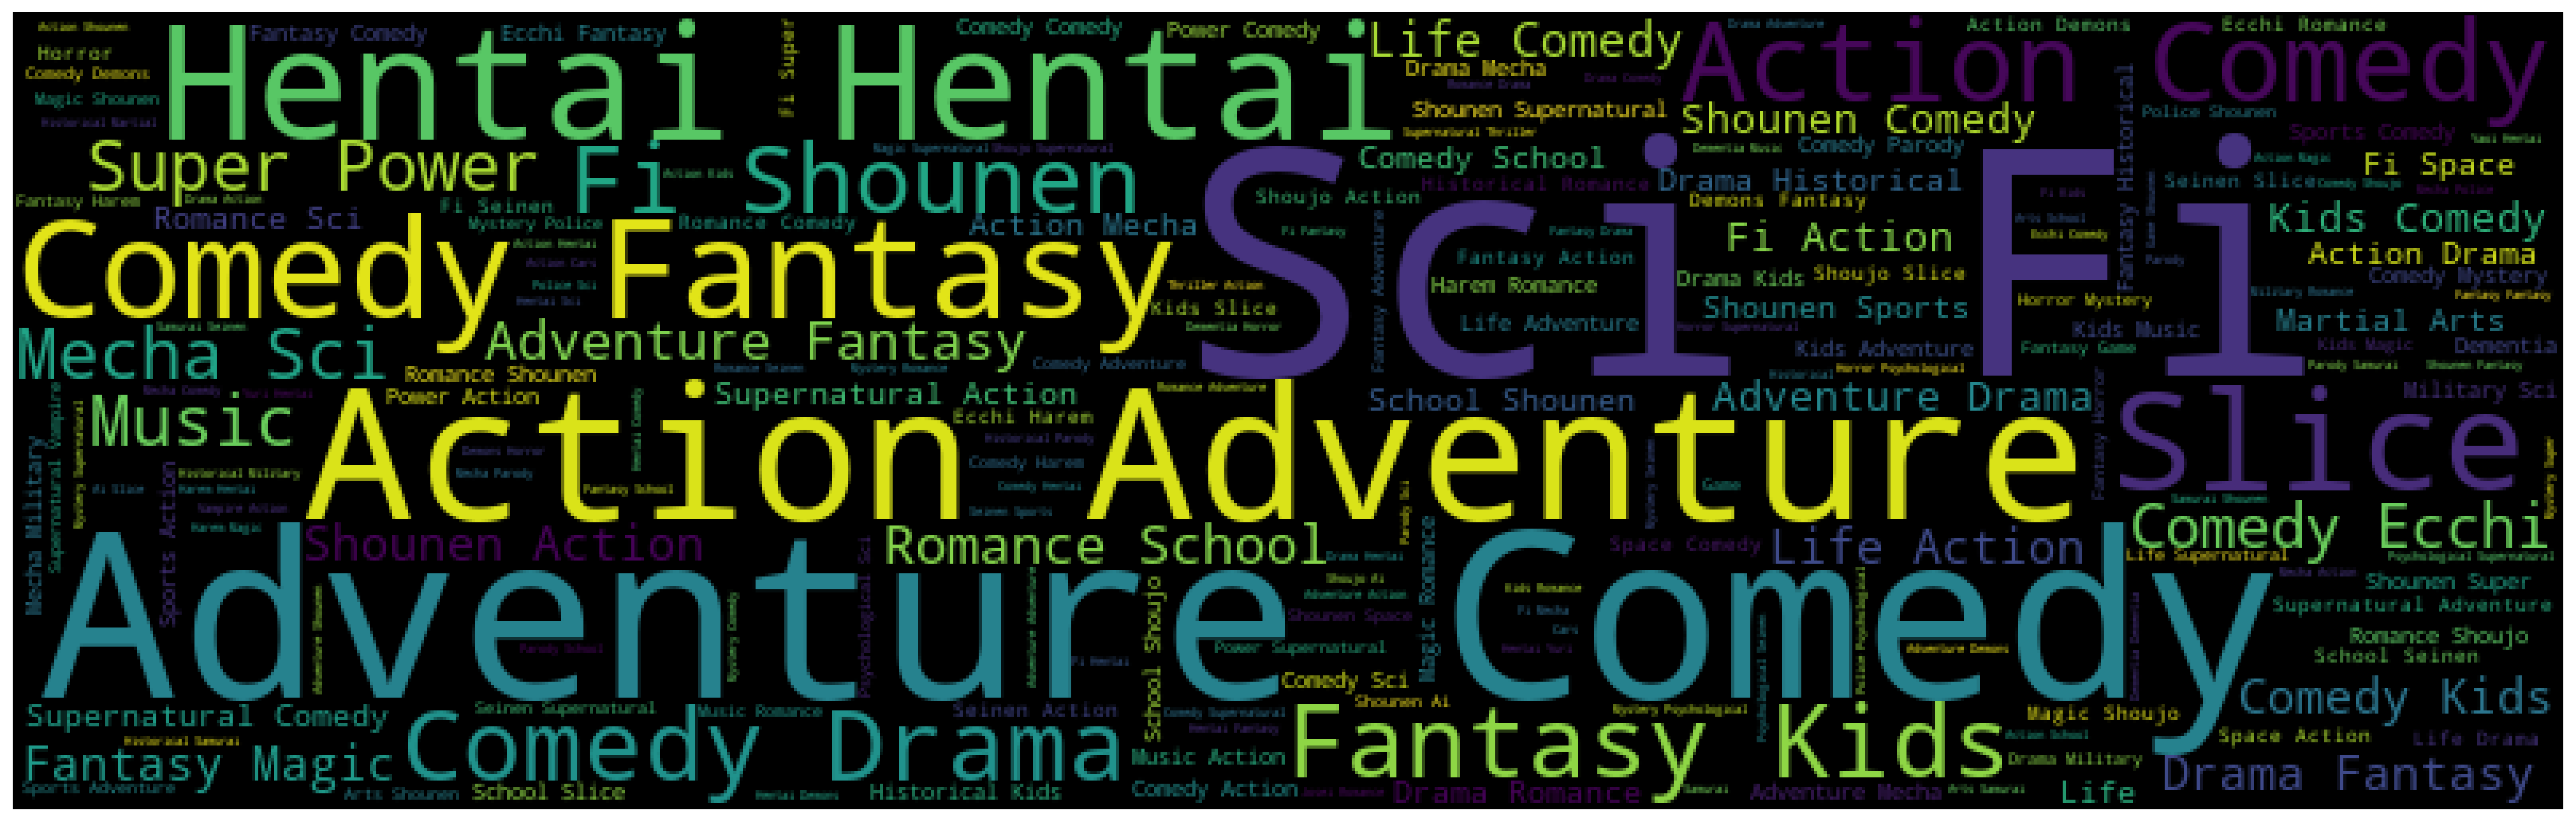

In [19]:
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 250,max_font_size=100).generate(anime["genre"].str.cat(sep=", | , | ,"))

plt.figure(figsize = (20, 8)) 
plt.imshow(wordcloud)
plt.axis("off")
plt.margins(x = 0, y = 0)
plt.tight_layout(pad = 0) 
plt.show()

In [20]:
data["user_rating"].replace(to_replace = -1 , value = np.nan ,inplace=True)
data = data.dropna(axis = 0)
data.isnull().sum()

anime_id       0
name           0
genre          0
type           0
episodes       0
rating         0
members        0
user_id        0
user_rating    0
dtype: int64

In [21]:
#size of merged data
data.shape

(6337238, 9)

In [22]:
import re
def text_cleaning(text):
    text = re.sub(r'&quot;', '', text)
    text = re.sub(r'.hack//', '', text)
    text = re.sub(r'&#039;', '', text)
    text = re.sub(r'A&#039;s', '', text)
    text = re.sub(r'I&#039;', 'I\'', text)
    text = re.sub(r'&amp;', 'and', text)
    
    return text

data["name"] = data["name"].apply(text_cleaning)

In [23]:
#Extract Review count
review_count_data = data.groupby('anime_id').size().reset_index()
review_count_data.columns = ['anime_id','review_count']

#Merge Review count with original data
data = data.merge(review_count_data,on='anime_id')

data.head()

,anime_id,name,genre,type,episodes,rating,members,user_id,user_rating,review_count
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5.0,1961
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10.0,1961
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10.0,1961
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10.0,1961
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,322,10.0,1961


Building Recommendation System¶
There are the following techniques which we will use to build recommendation systems -

Avg Weighted hybrid technique for Recommender system

a) Recommendation by Avg Weighted Rating(considering both rating & no. of reviews)

b) Recommendation by Popularity

c) Recommemdation by Avg Weighted Rating & Popularity

Collaborative filtering

linkcode
1. Avg Weighted Technique & Popularity
a) Recommendation by Avg Weighted Rating(considering both rating & no. of reviews)

In [24]:
#Extract anime_id, rating, review_count & members for each anime
weighted_data = data.groupby('anime_id')[['name','rating','review_count','members']].max().reset_index()
weighted_data.head()

,anime_id,name,rating,review_count,members
0,1,Cowboy Bebop,8.82,13449,486824
1,5,Cowboy Bebop: Tengoku no Tobira,8.40,5790,137636
2,6,Trigun,8.32,9385,283069
3,7,Witch Hunter Robin,7.36,2169,64905
4,8,Beet the Vandel Buster,7.06,308,9848


In [25]:
# Calculate all the components to calculate average weighted rating
v=weighted_data['review_count']
R=weighted_data['rating']
C=weighted_data['rating'].mean()
m=weighted_data['review_count'].quantile(0.50)

weighted_data['weighted_average']=((R*v)+ (C*m))/(v+m)
weighted_data.head()

,anime_id,name,rating,review_count,members,weighted_average
0,1,Cowboy Bebop,8.82,13449,486824,8.810578
1,5,Cowboy Bebop: Tengoku no Tobira,8.40,5790,137636,8.382330
2,6,Trigun,8.32,9385,283069,8.309541
3,7,Witch Hunter Robin,7.36,2169,64905,7.340218
4,8,Beet the Vandel Buster,7.06,308,9848,6.986205


Text(0, 0.5, 'Anime Title')

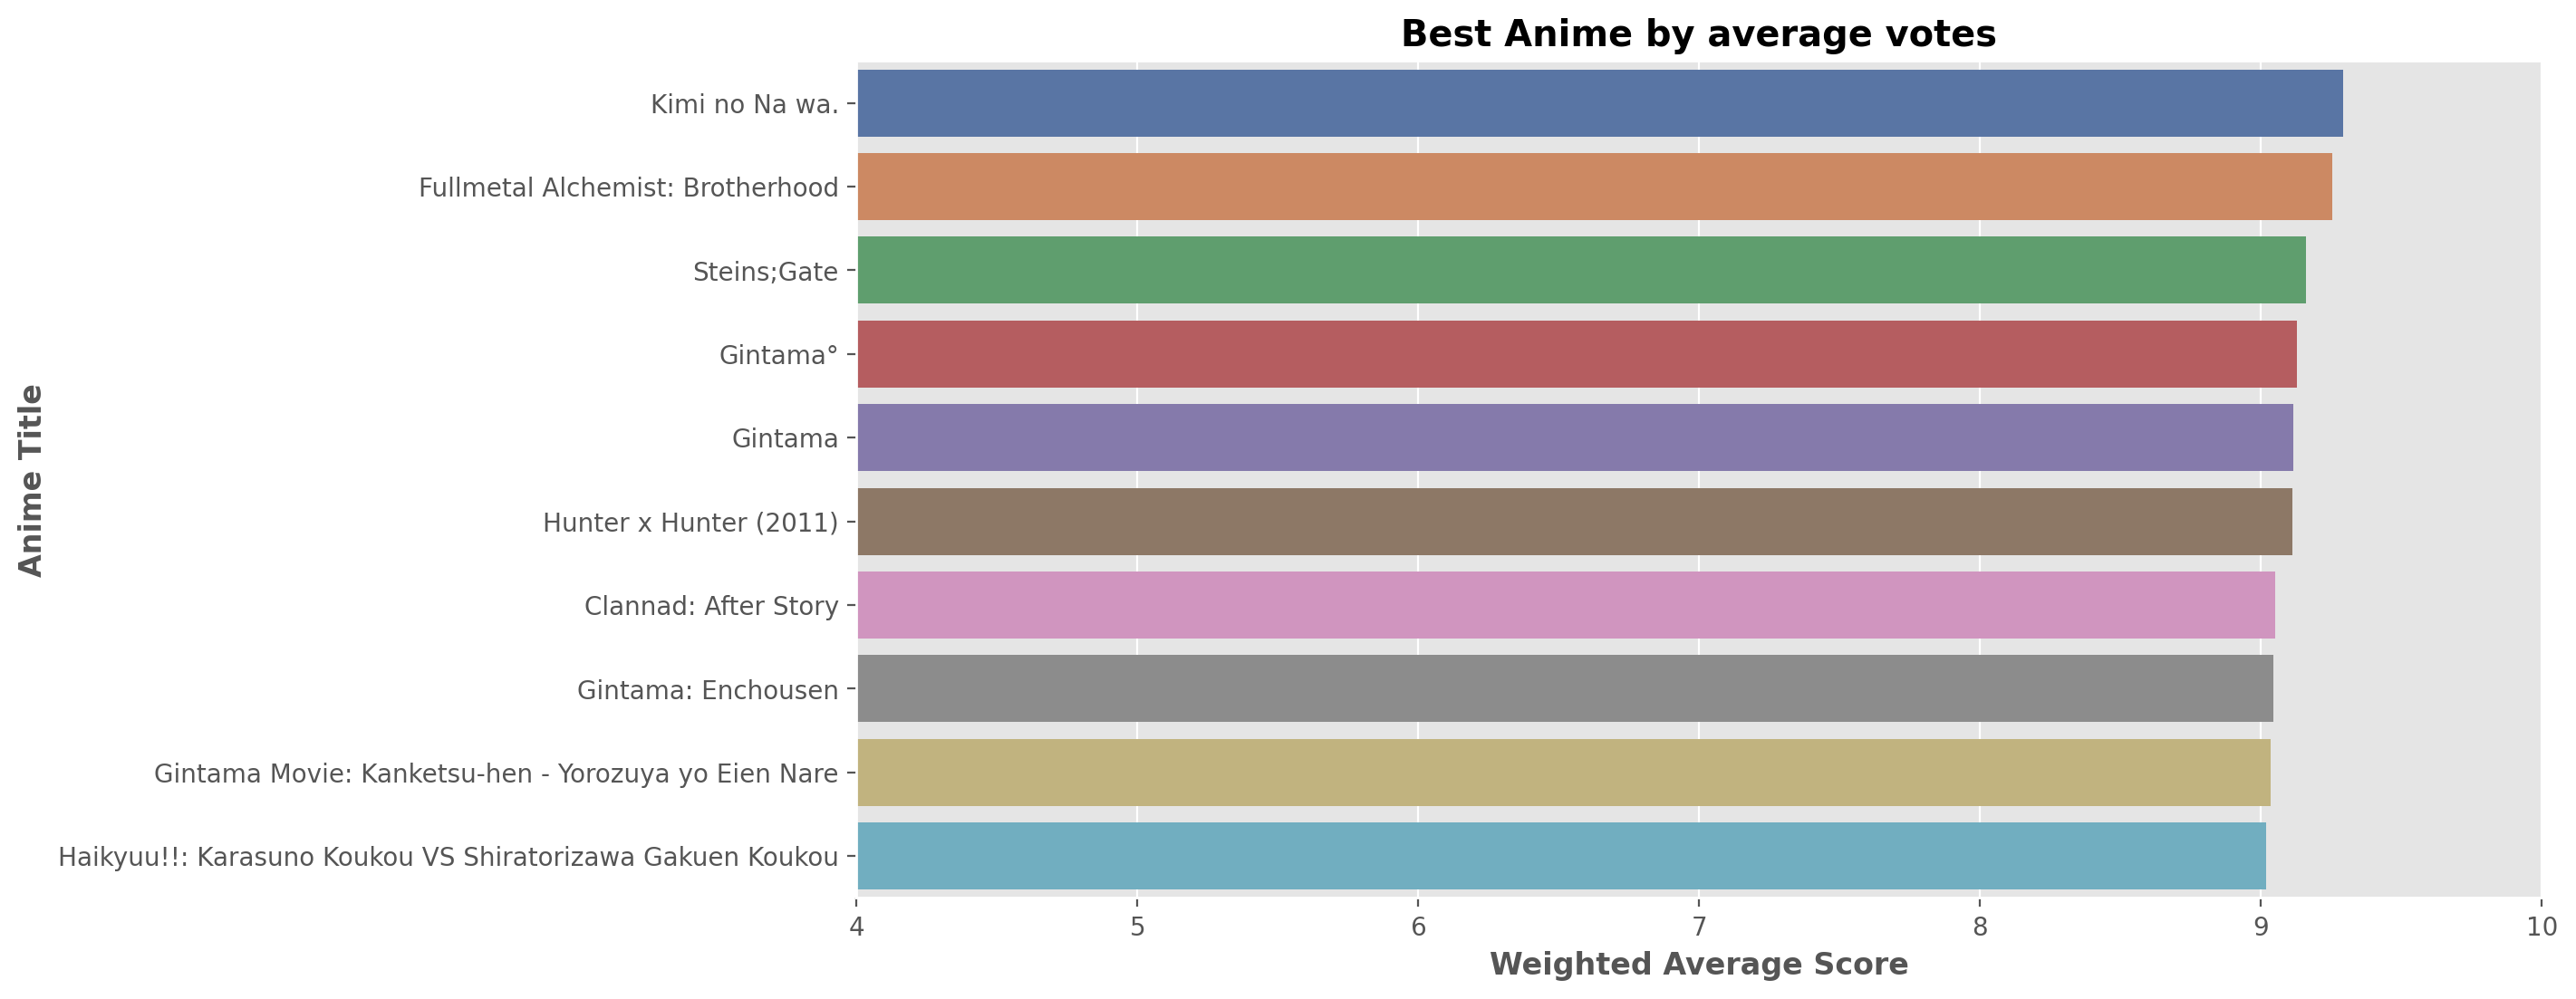

In [26]:
weight_average=weighted_data.sort_values('weighted_average',ascending=False)

plt.figure(figsize=(12,6))
axis1=sns.barplot(x=weight_average['weighted_average'].head(10), y=weight_average['name'].head(10), data=weight_average)
plt.xlim(4, 10)
plt.title('Best Anime by average votes', weight='bold')
plt.xlabel('Weighted Average Score', weight='bold')
plt.ylabel('Anime Title', weight='bold')

linkcode
Recommendation

Top recommendations based on weighted average rating: Kimi no Na wa and Fullmetal Alchemist: Brotherhood

b) Recommendation by Popularity

Text(0, 0.5, 'Anime Title')

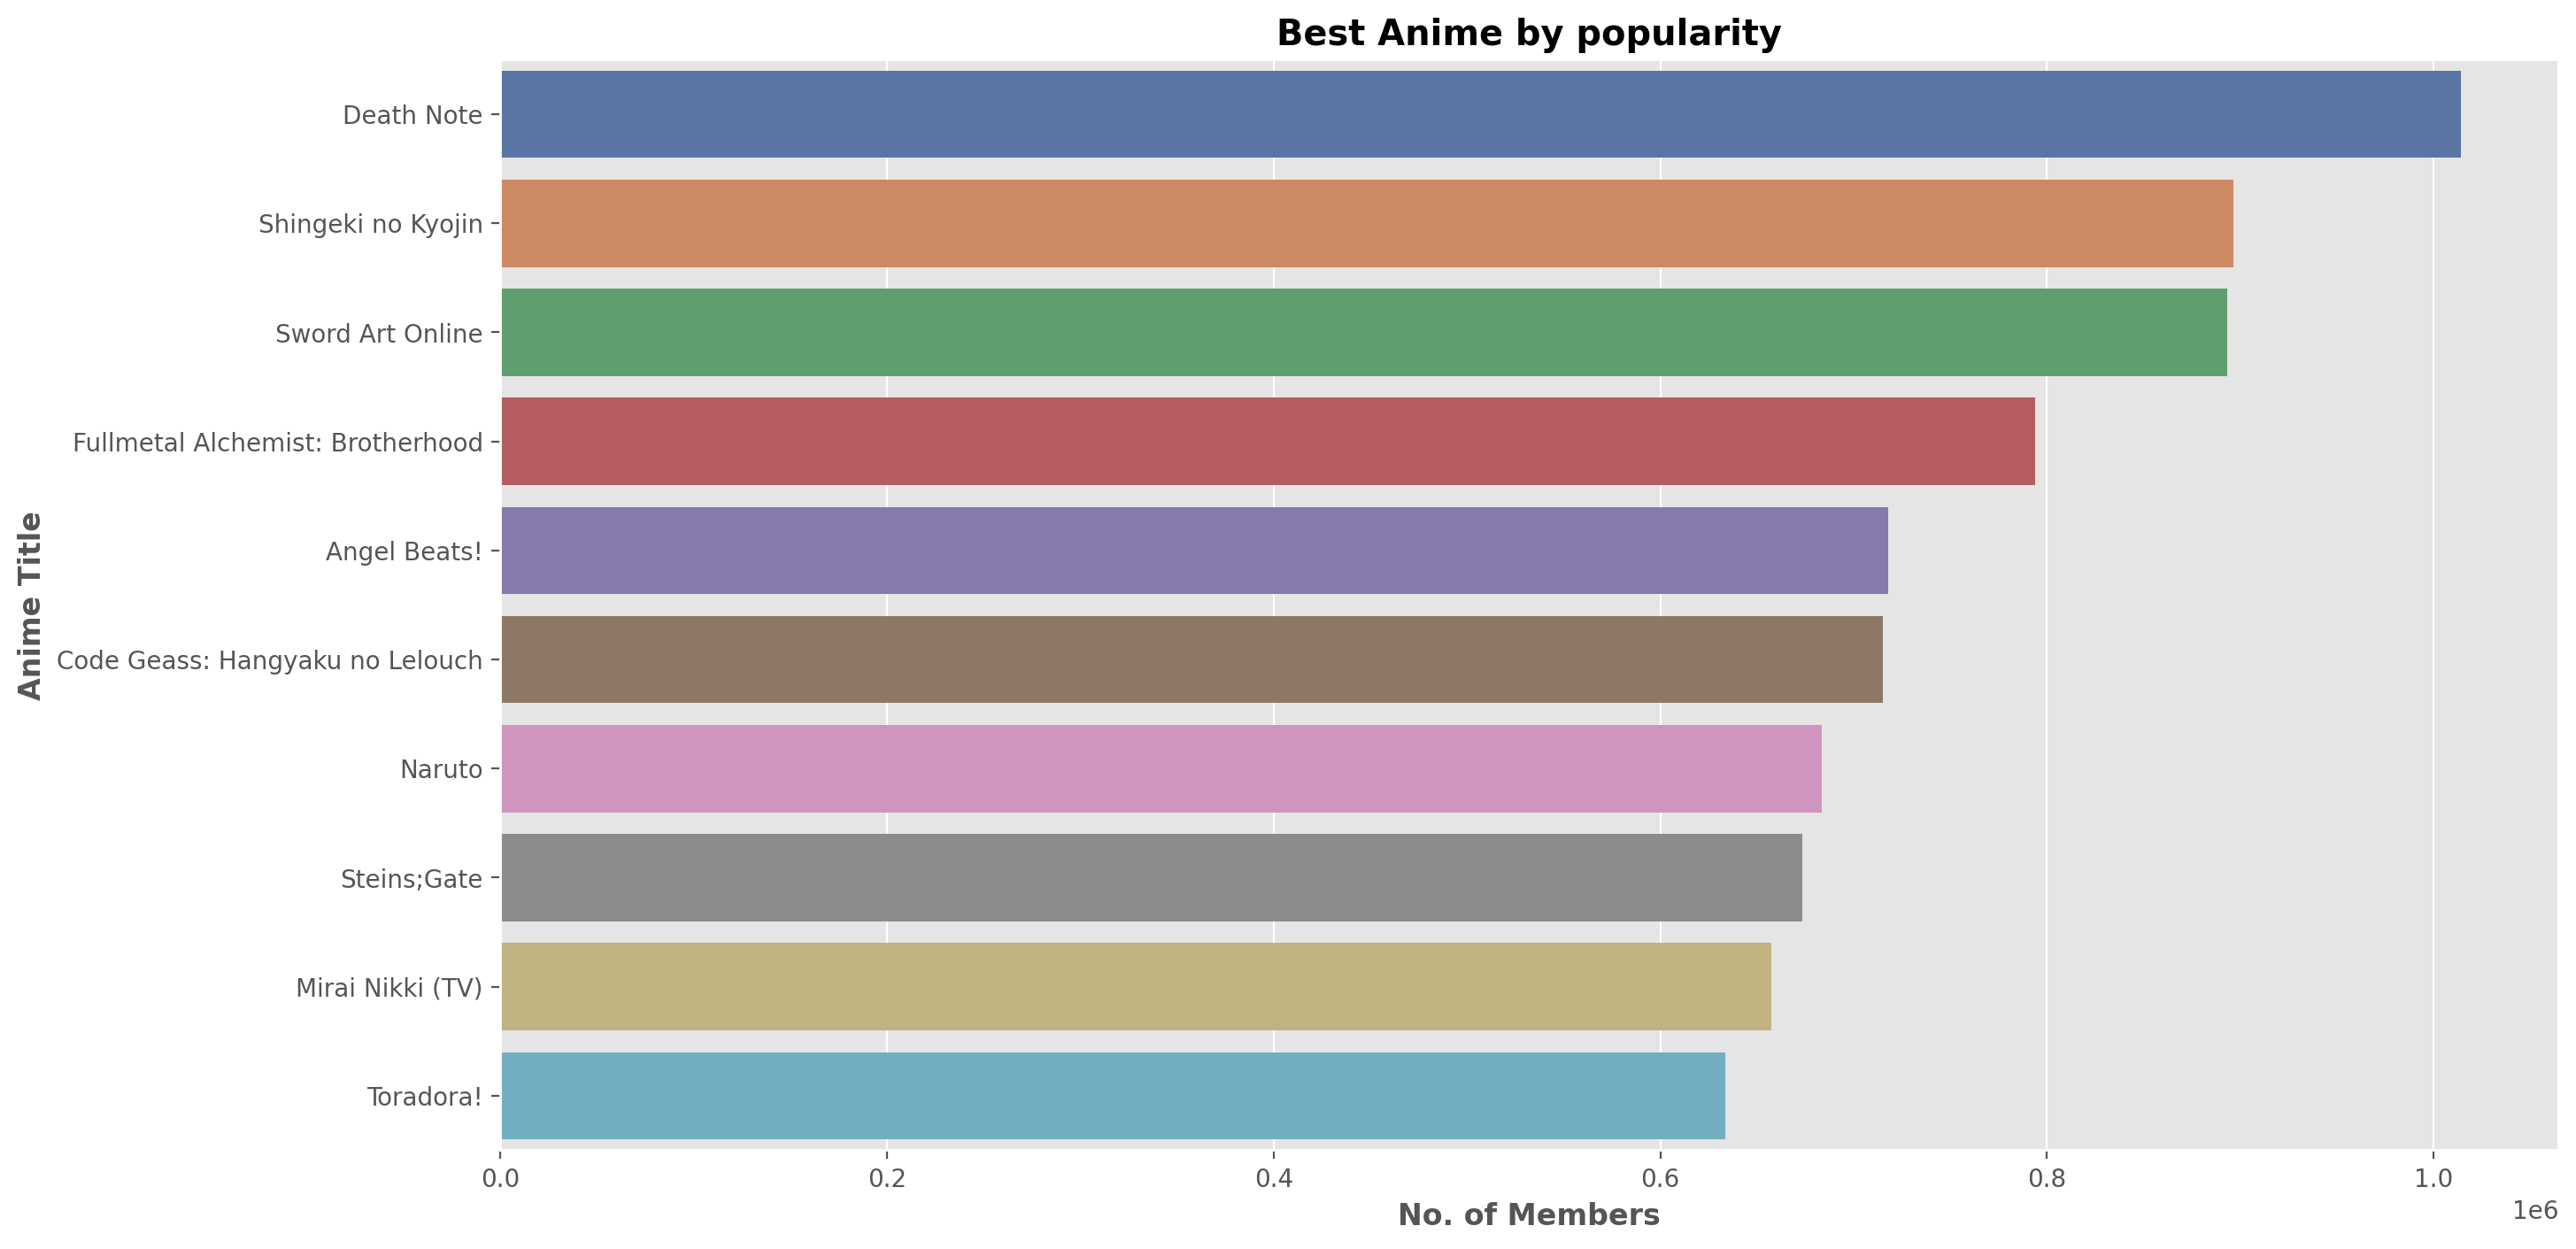

In [27]:
popularity_ranking=weighted_data.sort_values('members',ascending=False)

plt.figure(figsize=(15,8))
axis1=sns.barplot(x=popularity_ranking['members'].head(10), y=popularity_ranking['name'].head(10), data=popularity_ranking)
plt.title('Best Anime by popularity', weight='bold')
plt.xlabel('No. of Members', weight='bold')
plt.ylabel('Anime Title', weight='bold')

Recommendation

Top recommendations based on popularity: Death Note and Shingeki no Kyojin

c) Recommendation by Average weighted rating & popularity

In [28]:
#Scaling
from sklearn.preprocessing import MinMaxScaler

scaling=MinMaxScaler()
anime_scaled_df=scaling.fit_transform(weighted_data[['weighted_average','members']])
anime_scaled_df=pd.DataFrame(anime_scaled_df,columns=['weighted_average','members'])
anime_scaled_df.head()

,weighted_average,members
0,0.928224,0.480125
1,0.864297,0.135719
2,0.853432,0.279160
3,0.708736,0.063984
4,0.655890,0.009681


In [29]:
weighted_data[['normalized_weight_average','normalized_popularity']]= anime_scaled_df
weighted_data.head()

,anime_id,name,rating,review_count,members,weighted_average,normalized_weight_average,normalized_popularity
0,1,Cowboy Bebop,8.82,13449,486824,8.810578,0.928224,0.480125
1,5,Cowboy Bebop: Tengoku no Tobira,8.40,5790,137636,8.382330,0.864297,0.135719
2,6,Trigun,8.32,9385,283069,8.309541,0.853432,0.279160
3,7,Witch Hunter Robin,7.36,2169,64905,7.340218,0.708736,0.063984
4,8,Beet the Vandel Buster,7.06,308,9848,6.986205,0.655890,0.009681


In [30]:
#Generate score by giving equal weight to popularity & weighted average
weighted_data['score'] = weighted_data['normalized_weight_average'] * 0.5 + weighted_data['normalized_popularity'] * 0.5
weighted_data.sort_values(['score'], ascending=False).head()

,anime_id,name,rating,review_count,members,weighted_average,normalized_weight_average,normalized_popularity,score
1388,1535,Death Note,8.71,34226,1013917,8.706471,0.912684,1.000000,0.956342
3936,5114,Fullmetal Alchemist: Brotherhood,9.26,21494,793665,9.252931,0.994257,0.782764,0.888510
7059,16498,Shingeki no Kyojin,8.54,25289,896229,8.535609,0.887178,0.883924,0.885551
6323,11757,Sword Art Online,7.83,26310,893100,7.827314,0.781447,0.880837,0.831142
5517,9253,Steins;Gate,9.17,17151,673572,9.161446,0.980600,0.664316,0.822458


Text(0, 0.5, 'Anime Title')

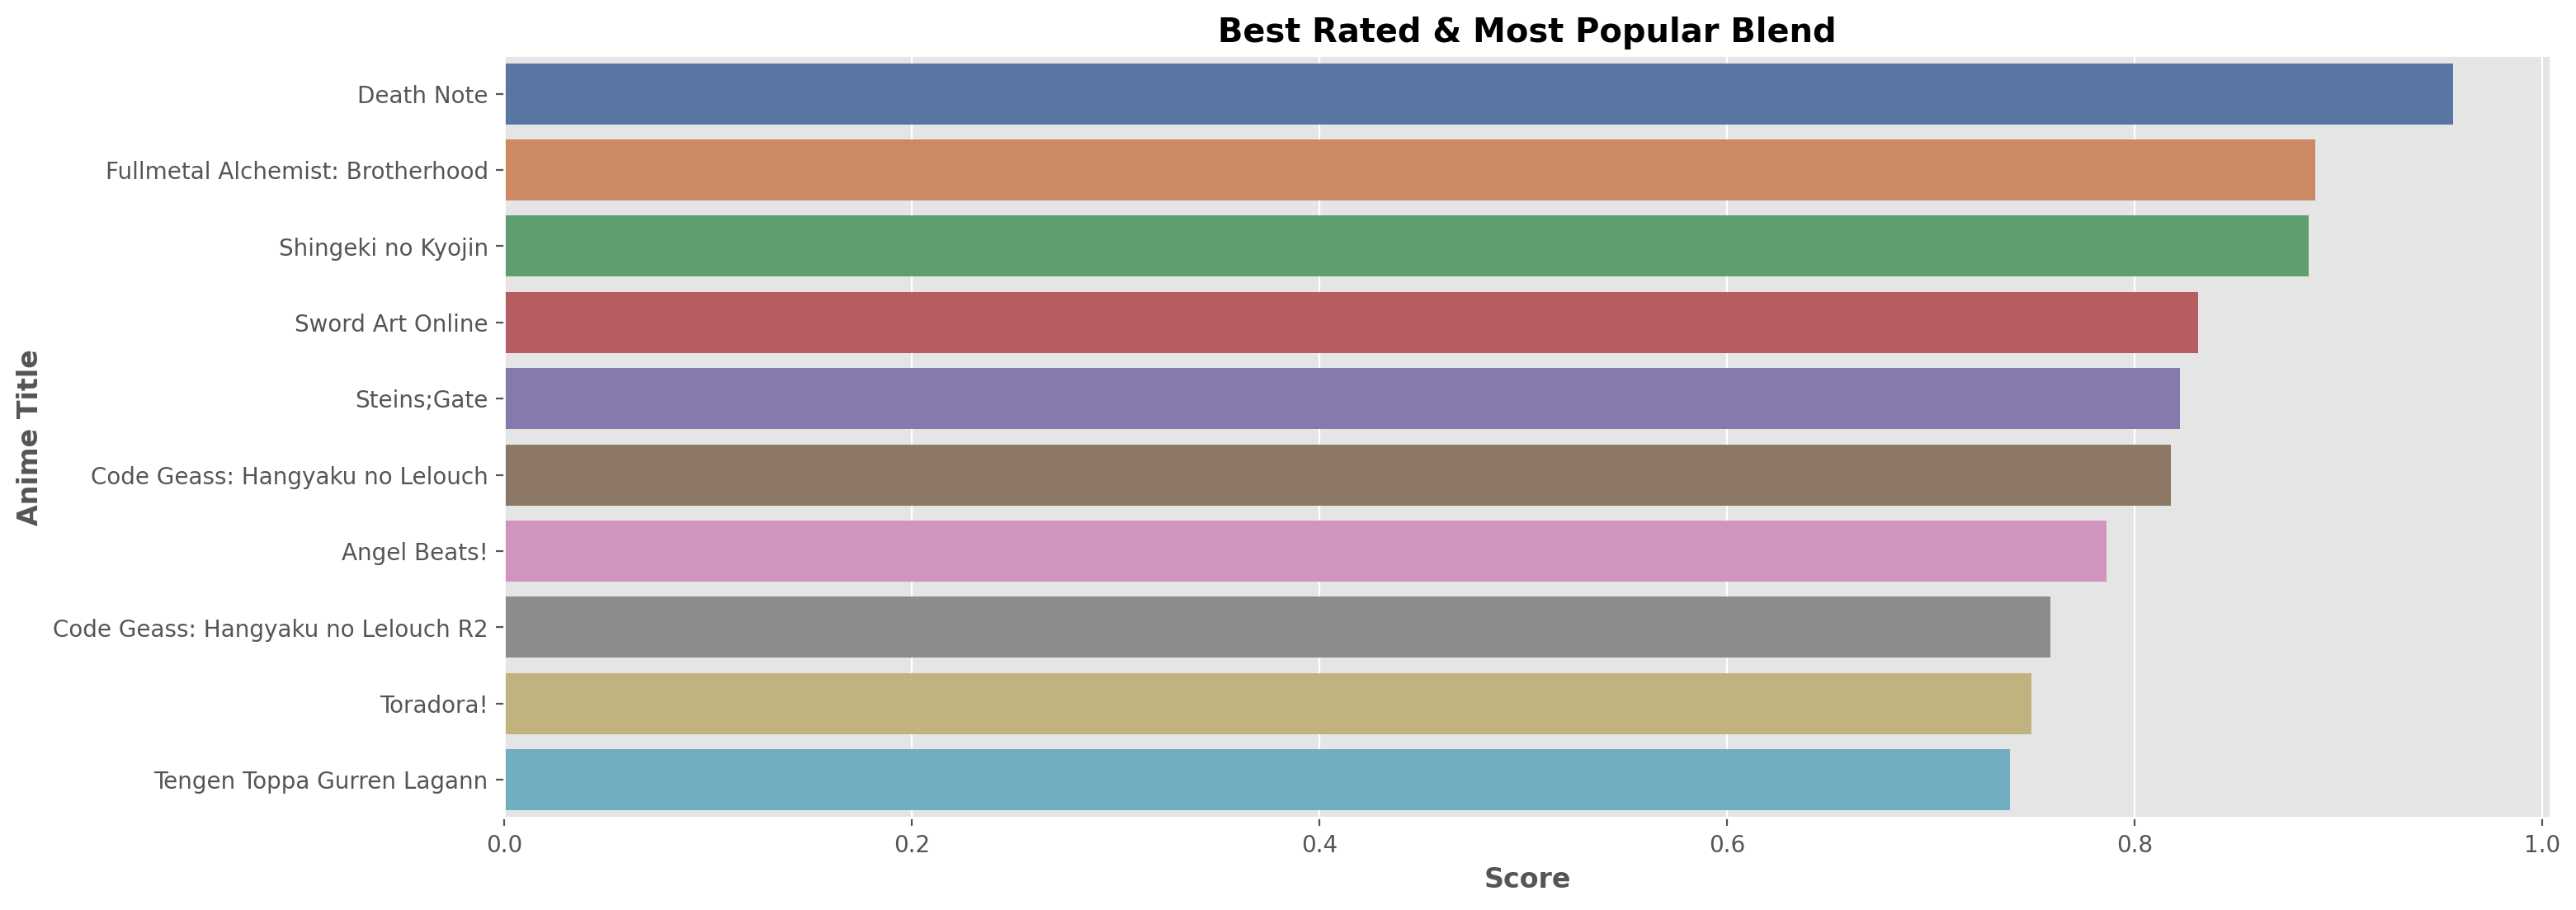

In [31]:
scored_df = weighted_data.sort_values('score', ascending=False)

plt.figure(figsize=(16,6))

ax = sns.barplot(x=scored_df['score'].head(10), y=scored_df['name'].head(10), data=scored_df, palette='deep')

plt.title('Best Rated & Most Popular Blend', weight='bold')
plt.xlabel('Score', weight='bold')
plt.ylabel('Anime Title', weight='bold')

linkcode
Recommendation

Top recommendations based on weighted average rating & popularity: Death Note and Fullmetal Alchemist: Brotherhood.

The initial recommendation models relied on simple factors like average rating, number of votes, and popularity of the anime. However, to enhance customer experience and viewership, future recommendation models will take into account user ratings of anime. This personalized approach will enable us to recommend anime based on individual preferences, thereby improving the overall user satisfaction and engagement.

linkcode
2. Collaborative filtering
Now let's create a matrix that has the user ids on one access and the anime title on another axis. Each cell will then consist of the rating the user gave to that anime. Note there will be a lot of NaN values, because most people have not seen most of the animes.

In [32]:
animemat = data.pivot_table(index='user_id',columns='name',values='user_rating')
animemat.head()

name,0,001,009 Re:Cyborg,009-1,009-1: RandB,00:08,07-Ghost,1+2=Paradise,100%,100-man-nen Chikyuu no Tabi: Bander Book,...,lilac (bombs Jun Togawa),makemagic,s.CRY.ed,vivi,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,◯
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
weighted_data.sort_values('review_count',ascending=False)[['anime_id','name','review_count']].head(10)

,anime_id,name,review_count
1388,1535,Death Note,34226
6323,11757,Sword Art Online,26310
7059,16498,Shingeki no Kyojin,25289
1426,1575,Code Geass: Hangyaku no Lelouch,24126
4567,6547,Angel Beats!,23565
201,226,Elfen Lied,23528
10,20,Naruto,22071
3936,5114,Fullmetal Alchemist: Brotherhood,21494
99,121,Fullmetal Alchemist,21332
2642,2904,Code Geass: Hangyaku no Lelouch R2,21124


In [34]:
deathnote_user_ratings = animemat['Death Note']
swordart_user_ratings = animemat['Sword Art Online']
deathnote_user_ratings.head()

user_id
1     NaN
2     NaN
3    10.0
5     4.0
7     9.0
Name: Death Note, dtype: float64

In [35]:
similar_to_deathnote = animemat.corrwith(deathnote_user_ratings)
similar_to_swordart = animemat.corrwith(swordart_user_ratings)

In [36]:
#Convert Series into dataframe and remove NaN values
corr_deathnote = pd.DataFrame(similar_to_deathnote,columns=['Correlation']).reset_index()
corr_deathnote.dropna(inplace=True)

#Find the top 10 correlated movies with Death Note
corr_deathnote.sort_values('Correlation',ascending=False).head(10)

,name,Correlation
6596,Oshiri Kajiri Mushi (TV) 3rd Season,1.0
8286,Stitch!: Piko Kara no Chousenjou,1.0
2722,Ginga Tetsudou 999: Hoshizora wa Time Machine,1.0
6044,Nansensu Monogatari Dai Ippen: Sarugashima,1.0
9724,Yuki no Hi no Tayori,1.0
6985,Present Made no Michinori,1.0
5232,Mahou no Princess Minky Momo: Hitomi no Seiza ...,1.0
144,Ai (ONA),1.0
542,Asari-chan,1.0
4313,Kero Kero Keroppi no Boku-tachi no Takaramono,1.0


After sorting the data by correlation, we should get the most similar movies, however note that we get some results that don't really make sense. This is because there are a lot of movies only watched once by users who also watched death note (it was the most popular movie).

Let's fix this by filtering out movies that have less than 100 reviews.

In [37]:
corr_deathnote = corr_deathnote.merge(weighted_data[['review_count','name']],on='name')
corr_deathnote.head()

,name,Correlation,review_count
0,0,0.133440,17
1,001,0.337497,10
2,009 Re:Cyborg,0.241212,238
3,009-1,0.034491,244
4,009-1: RandB,0.102203,98


In [38]:
corr_deathnote[corr_deathnote['review_count']>100].sort_values('Correlation',ascending=False).head()

,name,Correlation,review_count
1477,Death Note,1.000000,34226
1478,Death Note Rewrite,0.485444,3006
1634,Discode: Ijou Seiai,0.449202,113
1397,Daiakuji: The Xena Buster,0.447568,145
2260,Gallery Fake,0.443418,135


linkcode
According to this recommendation model, if the user has watched Death Note. Next anime that will be recommended is Death Note Rewrite.

Let's apply the same for Sword art online.

In [39]:
corr_swordart = pd.DataFrame(similar_to_swordart,columns=['Correlation'])
corr_swordart.dropna(inplace=True)
corr_swordart = corr_swordart.merge(weighted_data[['review_count','name']],on='name')
corr_swordart[corr_swordart['review_count']>100].sort_values('Correlation',ascending=False).head()

,name,Correlation,review_count
7204,Sword Art Online,1.000000,26310
7208,Sword Art Online: Extra Edition,0.704634,4454
7205,Sword Art Online II,0.699912,11496
7586,Tokimeki Memorial: Only Love Specials,0.639343,133
4985,Mokei Senshi Gunpla Builders Beginning G,0.620449,102


In [40]:
def find_recommended_anime(name):
    anime_user_ratings = animemat[name]
    similar_to_anime = animemat.corrwith(anime_user_ratings)
    corr_anime = pd.DataFrame(similar_to_anime,columns=['Correlation'])
    corr_anime.dropna(inplace=True)
    corr_anime = corr_anime.merge(weighted_data[['review_count','name']],on='name')
    return corr_anime[corr_anime['review_count']>200].sort_values('Correlation',ascending=False).head(5)

In [41]:
find_recommended_anime("Naruto")

,name,Correlation,review_count
5005,Naruto,1.000000,22071
5024,Naruto: Takigakure no Shitou - Ore ga Eiyuu Da...,0.612857,2719
5013,Naruto Soyokazeden Movie: Naruto to Mashin to ...,0.594234,884
5009,Naruto Narutimate Hero 3: Tsuini Gekitotsu! Jo...,0.588099,2101
5006,Naruto Movie 1: Dai Katsugeki!! Yuki Hime Shin...,0.582344,5897
